In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#Importing the dataset
Reviews = pd.read_csv("movie_data.csv")
Negative_Reviews = 0
Positive_Reviews = 0
for i,row in Reviews.iterrows():
    if row['sentiment'] == 0:
        Negative_Reviews += 1
    else:
        Positive_Reviews += 1 
print("Total number of Reviews = ",len(Reviews))
print("Total number of positive Reviews = ",Positive_Reviews)
print("Total number of negative Reviews = ",Negative_Reviews)    
Reviews.head()

Total number of Reviews =  49969
Total number of positive Reviews =  24982
Total number of negative Reviews =  24987


,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

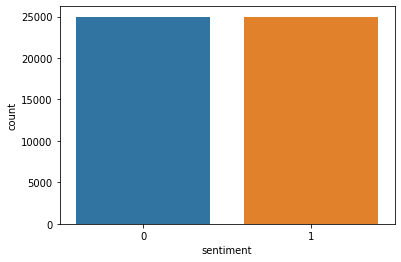

In [3]:
import seaborn as sns

sns.countplot(x='sentiment', data=Reviews)

In [4]:
#Lowercasing
for i,row in Reviews.iterrows():
    X = row['review'].lower()
    Reviews.at[i, "review"] = X

In [5]:
import string
#Removing punctuations    
for i,row in Reviews.iterrows():
    X = "".join([i for i in row['review'] if i not in string.punctuation])
    Reviews.at[i, "review"] = X

In [6]:
import re
#Tokenization
for i,row in Reviews.iterrows():
    X = re.split('W+',row['review'])
    Reviews.at[i, "review"] = X

In [7]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
#Stemming
for i,row in Reviews.iterrows():
    for word in row['review']:
        X = porter_stemmer.stem(word) 
    Reviews.at[i, "review"] = X
Reviews.head()

,review,sentiment
0,this movie is just crap even though the direct...,0
1,another detailed work on the subject by dr dwi...,1
2,the cat onine tails il gatto a nove code br br...,0
3,like with any movie genre there are good gangs...,0
4,i watched it with my mom and we were likebr br...,0


In [8]:
X = []
Y = []
sentences = Reviews['review']

In [9]:
for sen in sentences:
    X.append(sen)

In [10]:
Y = Reviews['sentiment']

In [11]:
#Dividing the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

In [12]:
#Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [14]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [15]:
score = logisticRegr.score(X_test, Y_test)
score = round(score,3)
print("Test Accuracy for the logistic regression model = ",score)

Test Accuracy for the logistic regression model =  0.514


In [16]:
predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(Y_test, predictions)

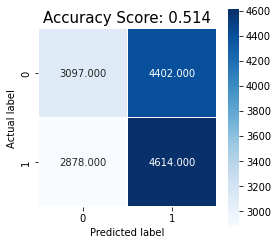

In [17]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [18]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46      7499
           1       0.51      0.62      0.56      7492

    accuracy                           0.51     14991
   macro avg       0.52      0.51      0.51     14991
weighted avg       0.52      0.51      0.51     14991



In [19]:
#One hot encoding target values
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [20]:
#Building Model 1 
model1 = keras.models.Sequential()
model1.add(keras.layers.Embedding(vocab_size, 64, input_length=maxlen))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(50, activation='sigmoid'))
model1.add(keras.layers.Dense(20, activation='sigmoid'))
model1.add(keras.layers.Dense(10, activation='sigmoid'))
model1.add(keras.layers.Dense(2, activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           9612736   
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 50)                320050    
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 9,934,038
Trainable params: 9,934,038
Non-

In [21]:
#Compliling Model 1
LR = 0.01
opt = SGD(learning_rate=LR)
model1.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
#Training Model 1
history = model1.fit(X_train, Y_train, epochs=10, shuffle=True, batch_size=128, validation_split=0.20)

Epoch 1/10
219/219 [==============================] - 3s 10ms/step - loss: 0.7048 - accuracy: 0.5003 - val_loss: 0.6973 - val_accuracy: 0.4986
Epoch 2/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6949 - accuracy: 0.5003 - val_loss: 0.6938 - val_accuracy: 0.4986
Epoch 3/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6934 - accuracy: 0.5003 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 4/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 5/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 6/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 7/10
219/219 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5013

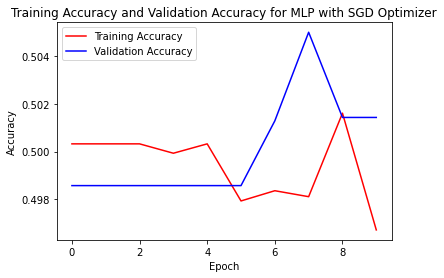

In [24]:
#Plotting the training accuracy and the validation accuracy for Model 1
plt.title('Training Accuracy and Validation Accuracy for MLP with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label = 'Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

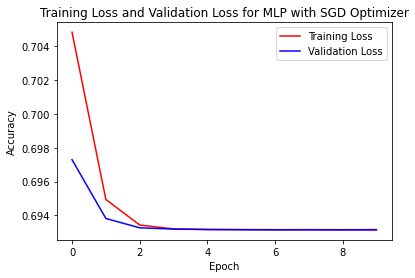

In [25]:
#Plotting the training loss and the validation loss for Model 1
plt.title('Training Loss and Validation Loss for MLP with SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label = 'Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [26]:
#Testing Model 1
loss, acc = model1.evaluate(X_test, Y_test)
acc = round(acc,3)
print("Test Loss = ",round(loss,3))
print("Test Accuracy = ",acc * 100.0,"%")

469/469 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Test Loss =  0.693
Test Accuracy =  50.0 %


In [27]:
Y_pred = model1.predict(X_test) 
Y_pred = np.argmax(Y_pred, axis=1)
Y_t = np.argmax(Y_test, axis=1)
CM = confusion_matrix(Y_t, Y_pred)

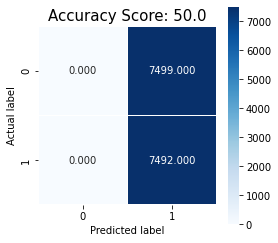

In [28]:
plt.figure(figsize=(4,4))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc*100.0)
plt.title(all_sample_title, size = 15);

In [29]:
print(classification_report(Y_t, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7499
           1       0.50      1.00      0.67      7492

    accuracy                           0.50     14991
   macro avg       0.25      0.50      0.33     14991
weighted avg       0.25      0.50      0.33     14991



c:\python\python3.9.1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python3.9.1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python3.9.1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Building Model 2
model2 = keras.models.Sequential()
model2.add(keras.layers.Embedding(vocab_size, 64, input_length=maxlen))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(50, activation='sigmoid'))
model2.add(keras.layers.Dense(20, activation='sigmoid'))
model2.add(keras.layers.Dense(10, activation='sigmoid'))
model2.add(keras.layers.Dense(2, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           9612736   
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                320050    
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 9,934,038
Trainable params: 9,934,038
No

In [31]:
#Compliling Model 2 
LR = 0.01
opt = Adam(learning_rate=LR)
model2.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
#Training Model 2
history = model2.fit(X_train, Y_train, epochs=10, shuffle=True, batch_size=128, validation_split=0.20)

Epoch 1/10
219/219 [==============================] - 38s 170ms/step - loss: 0.4692 - accuracy: 0.7830 - val_loss: 0.3704 - val_accuracy: 0.8396
Epoch 2/10
219/219 [==============================] - 37s 169ms/step - loss: 0.2516 - accuracy: 0.9070 - val_loss: 0.3910 - val_accuracy: 0.8323
Epoch 3/10
219/219 [==============================] - 37s 170ms/step - loss: 0.1231 - accuracy: 0.9634 - val_loss: 0.4908 - val_accuracy: 0.8246
Epoch 4/10
219/219 [==============================] - 37s 170ms/step - loss: 0.0746 - accuracy: 0.9805 - val_loss: 0.5545 - val_accuracy: 0.8268
Epoch 5/10
219/219 [==============================] - 37s 169ms/step - loss: 0.0539 - accuracy: 0.9872 - val_loss: 0.6132 - val_accuracy: 0.8262
Epoch 6/10
219/219 [==============================] - 37s 170ms/step - loss: 0.0468 - accuracy: 0.9888 - val_loss: 0.6953 - val_accuracy: 0.8223
Epoch 7/10
219/219 [==============================] - 37s 170ms/step - loss: 0.0426 - accuracy: 0.9902 - val_loss: 0.6372 - val_ac

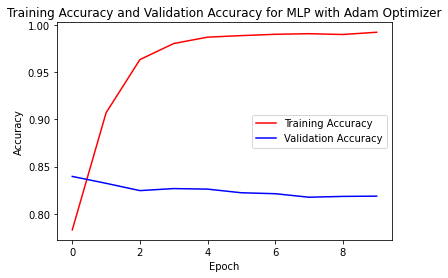

In [33]:
#Plotting the training accuracy and the validation accuracy for Model 2
plt.title('Training Accuracy and Validation Accuracy for MLP with Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label = 'Validation Accuracy')
plt.legend(loc='center right')
plt.show()

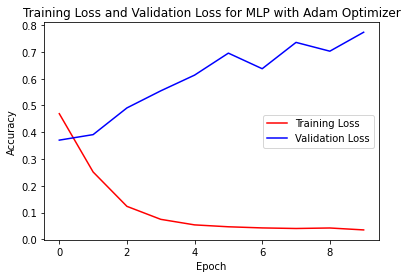

In [34]:
#Plotting the training loss and the validation loss for Model 2
plt.title('Training Loss and Validation Loss for MLP with Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label = 'Validation Loss')
plt.legend(loc='center right')
plt.show()

In [36]:
#Testing Model 2
loss, acc = model2.evaluate(X_test, Y_test)
acc = round(acc,3)
print("Test Loss = ",round(loss,3))
print("Test Accuracy = ",acc * 100.0,"%")

469/469 [==============================] - 1s 2ms/step - loss: 0.7926 - accuracy: 0.8183
Test Loss =  0.793
Test Accuracy =  81.8 %


In [37]:
Y_pred = model2.predict(X_test) 
Y_pred = np.argmax(Y_pred, axis=1)
Y_t = np.argmax(Y_test, axis=1)
CM = confusion_matrix(Y_t, Y_pred)

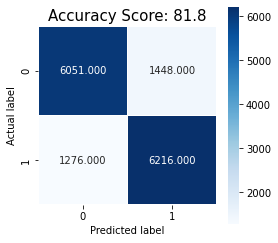

In [38]:
plt.figure(figsize=(4,4))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc*100.0)
plt.title(all_sample_title, size = 15);

In [39]:
print(classification_report(Y_t, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7499
           1       0.81      0.83      0.82      7492

    accuracy                           0.82     14991
   macro avg       0.82      0.82      0.82     14991
weighted avg       0.82      0.82      0.82     14991



In [46]:
#Building Model 3
model3 = keras.models.Sequential()
model3.add(keras.layers.Embedding(vocab_size, 64, input_length=maxlen))
model3.add(keras.layers.LSTM(64))
model3.add(keras.layers.Dense(50, activation='sigmoid'))
model3.add(keras.layers.Dense(20, activation='sigmoid'))
model3.add(keras.layers.Dense(10, activation='sigmoid'))
model3.add(keras.layers.Dense(2, activation="sigmoid"))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 64)           9612736   
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 50)                3250      
                                                                 
 dense_14 (Dense)            (None, 20)                1020      
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 2)                 22        
                                                                 
Total params: 9,650,262
Trainable params: 9,650,262
No

In [47]:
#Compliling Model 3
LR = 0.01
opt = Adam(learning_rate=LR)
model3.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
#Training Model 3
history = model3.fit(X_train, Y_train, epochs=10, shuffle=True, batch_size=128, validation_split=0.20)

Epoch 1/10
219/219 [==============================] - 54s 232ms/step - loss: 0.6555 - accuracy: 0.5976 - val_loss: 0.5546 - val_accuracy: 0.7421
Epoch 2/10
219/219 [==============================] - 53s 241ms/step - loss: 0.4098 - accuracy: 0.8216 - val_loss: 0.3607 - val_accuracy: 0.8386
Epoch 3/10
219/219 [==============================] - 52s 239ms/step - loss: 0.2990 - accuracy: 0.8789 - val_loss: 0.3999 - val_accuracy: 0.8359
Epoch 4/10
219/219 [==============================] - 55s 252ms/step - loss: 0.2526 - accuracy: 0.9013 - val_loss: 0.3499 - val_accuracy: 0.8491
Epoch 5/10
219/219 [==============================] - 52s 239ms/step - loss: 0.1987 - accuracy: 0.9255 - val_loss: 0.4035 - val_accuracy: 0.8431
Epoch 6/10
219/219 [==============================] - 54s 245ms/step - loss: 0.1656 - accuracy: 0.9411 - val_loss: 0.4040 - val_accuracy: 0.8415
Epoch 7/10
219/219 [==============================] - 55s 253ms/step - loss: 0.1409 - accuracy: 0.9515 - val_loss: 0.4395 - val_ac

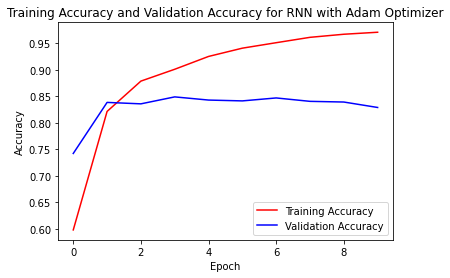

In [49]:
#Plotting the training accuracy and the validation accuracy for Model 3
plt.title('Training Accuracy and Validation Accuracy for RNN with Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

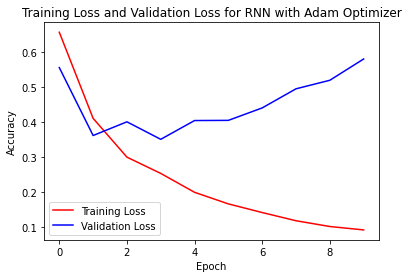

In [57]:
#Plotting the training loss and the validation loss for Model 3
plt.title('Training Loss and Validation Loss for RNN with Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label = 'Validation Loss')
plt.legend(loc='lower left')
plt.show()

In [52]:
#Testing Model 3
loss, acc = model3.evaluate(X_test, Y_test)
acc = round(acc,3)
print("Test Loss = ",round(loss,3))
print("Test Accuracy = ",acc * 100.0,"%")

469/469 [==============================] - 5s 11ms/step - loss: 0.5778 - accuracy: 0.8294
Test Loss =  0.578
Test Accuracy =  82.89999999999999 %


In [53]:
Y_pred = model3.predict(X_test) 
Y_pred = np.argmax(Y_pred, axis=1)
Y_t = np.argmax(Y_test, axis=1)
CM = confusion_matrix(Y_t, Y_pred)

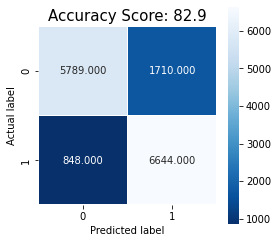

In [54]:
plt.figure(figsize=(4,4))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 82.9'
plt.title(all_sample_title, size = 15);

In [55]:
print(classification_report(Y_t, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7499
           1       0.80      0.89      0.84      7492

    accuracy                           0.83     14991
   macro avg       0.83      0.83      0.83     14991
weighted avg       0.83      0.83      0.83     14991



#### 